# Contours and Segmentation

## Binarization of grayscale images using the Otsu algorithm
It's useful when you have only two classes in an input image and want to extract them without anymanual threshold adjusting.

In [1]:
import cv2, numpy as np, matplotlib.pyplot as plt

In [2]:
image = cv2.imread('./275725.jpg',0)

#### cv2.threshold
第一個原圖像<br>
第二個進行分類的閾值<br>
第三個是高於（低於）閾值時賦予的新值<br>
<br>
第四個是一個方法選擇參數，常用的有：<br>
• cv2.THRESH_BINARY（黑白二值）<br>
• cv2.THRESH_BINARY_INV（黑白二值反轉）<br>
• cv2.THRESH_TRUNC （得到的圖像為多像素值）<br>
• cv2.THRESH_TOZERO <br>
• cv2.THRESH_TOZERO_INV <br>

兩個返回值，第一個retVal（得到的閾值值（在後面一個方法中會用到））<br>
第二個就是閾值化後的圖像。

In [3]:
image

array([[255, 254, 254, ..., 255, 255, 255],
       [255, 253, 252, ..., 255, 255, 255],
       [255, 253, 251, ..., 255, 255, 255],
       ...,
       [ 55,  56,  56, ..., 167, 168, 171],
       [ 56,  56,  56, ..., 167, 169, 171],
       [ 56,  56,  57, ..., 168, 169, 171]], dtype=uint8)

In [4]:
#Estimate the threshold using Otsu's method
bina_thr, bina_mask = cv2.threshold(image, 50, 255, cv2.THRESH_BINARY)
print('Estimated threshold (Binary): ', bina_thr)

Estimated threshold (Binary):  50.0


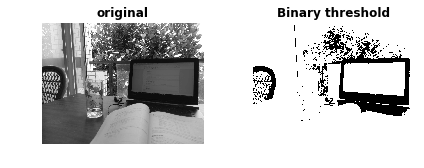

In [5]:
plt.figure()
plt.subplot(121)
plt.axis('off')
plt.title('original')
plt.imshow(image, cmap='gray')

plt.subplot(122)
plt.axis('off')
plt.title('Binary threshold')
plt.imshow(bina_mask, cmap='gray')

plt.tight_layout()
plt.show()

Otsu's非常適合於圖像灰度直方圖具有雙峰的情況，他會在雙峰之間找到一個值作為閾值，對於非雙峰圖像，可能並不是很好用。因為Otsu's方法會產生一個閾值，那麼函數cv2.threshold的的第二個參數（設置閾值）就是0了，並且在cv2.threshold的方法參數中還得加上語句cv2.THRESH_OTSU。

In [6]:
#Estimate the threshold using Otsu's method
otsu_thr, otsu_mask = cv2.threshold(image, 0, 255, cv2.THRESH_OTSU)
print('Estimated threshold (Otsu): ', otsu_thr)

Estimated threshold (Otsu):  124.0


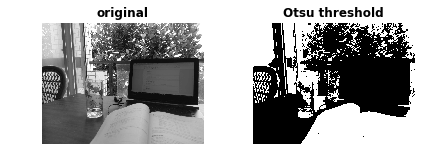

In [7]:
plt.figure()
plt.subplot(121)
plt.axis('off')
plt.title('original')
plt.imshow(image, cmap='gray')

plt.subplot(122)
plt.axis('off')
plt.title('Otsu threshold')
plt.imshow(otsu_mask, cmap='gray')

plt.tight_layout()
plt.show()

## Finding external and internal contours in a binary image

In [8]:
import cv2, numpy as np, matplotlib.pyplot as plt

In [9]:
image = cv2.imread('./BW.jpg',0)

cv2.findContours()有三個參數
* 第一個是輸入圖像<br>
* 第二個是輪廓檢索模式<br>
* 第三個是輪廓近似方法<br>
<br>
返回值有三個
* 第一個是圖像<br>
* 第二個是輪廓<br>
* 第三個是（輪廓的）層析結構。 [Next, Previous, First_Child, Parent]<br>
<br>
輪廓（第二個返回值）是一個Python列表，其中儲存這圖像中所有輪廓。每一個輪廓都是一個Numpy數組，包含對象邊界點（x，y）的坐標<br>
<br>
* cv2.RETR_EXTERNAL:返回最外層，所有孩子輪廓都不要
* cv2.RETR_CCOMP:獲取所有輪廓並組織到一個2層結構裡，對象的輪廓外邊界在等級1裡，輪廓內沿（如果有的話）放在層級2裡
* cv2.RETR_TREE:取回所有的輪廓並且創建完整的家族層級列表
* cv2.RETR_LIST:它獲取所有輪廓，但是不建立父子關係
<br><br>
* cv2.CHAIN_APPROX_NONE:存儲所有的輪廓點，相鄰的兩個點的像素位置差不超過1
* cv2.CHAIN_APPROX_SIMPLE:壓縮水平方向，垂直方向，對角線方向的元素，只保留該方向的終點坐標
* cv2.CHAIN_APPROX_TC89_L1:應用Teh-Chin鏈近似算法
* cv2.CHAIN_APPROX_TC89_KCOS:應用Teh-Chin鏈近似算法


In [10]:
_, contours, hierarchy = cv2.findContours(image,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [11]:
contours

[array([[[  0,   0]],
 
        [[  0, 224]],
 
        [[224, 224]],
 
        [[224,   0]]], dtype=int32), array([[[ 61, 212]],
 
        [[ 62, 211]],
 
        [[ 63, 212]],
 
        [[ 62, 213]]], dtype=int32), array([[[ 36, 195]],
 
        [[ 37, 194]],
 
        [[ 38, 195]],
 
        [[ 37, 196]]], dtype=int32), array([[[ 42, 194]],
 
        [[ 43, 193]],
 
        [[ 44, 194]],
 
        [[ 43, 195]]], dtype=int32), array([[[ 35, 194]],
 
        [[ 36, 193]],
 
        [[ 37, 194]],
 
        [[ 36, 195]]], dtype=int32), array([[[ 28, 187]],
 
        [[ 29, 186]],
 
        [[ 30, 187]],
 
        [[ 29, 188]]], dtype=int32), array([[[ 29, 181]],
 
        [[ 30, 180]],
 
        [[ 31, 181]],
 
        [[ 30, 182]]], dtype=int32), array([[[ 23, 180]],
 
        [[ 24, 179]],
 
        [[ 25, 180]],
 
        [[ 24, 181]]], dtype=int32), array([[[ 20, 177]],
 
        [[ 21, 176]],
 
        [[ 22, 177]],
 
        [[ 21, 178]]], dtype=int32), array([[[ 25, 176]],
 
    

In [12]:
hierarchy

array([[[-1, -1,  1, -1],
        [ 2, -1, -1,  0],
        [ 3,  1, -1,  0],
        [ 4,  2, -1,  0],
        [ 5,  3, -1,  0],
        [ 6,  4, -1,  0],
        [ 7,  5, -1,  0],
        [ 8,  6, -1,  0],
        [ 9,  7, -1,  0],
        [10,  8, -1,  0],
        [11,  9, -1,  0],
        [12, 10, -1,  0],
        [13, 11, -1,  0],
        [14, 12, -1,  0],
        [15, 13, -1,  0],
        [16, 14, -1,  0],
        [17, 15, -1,  0],
        [18, 16, -1,  0],
        [19, 17, -1,  0],
        [20, 18, -1,  0],
        [21, 19, -1,  0],
        [22, 20, -1,  0],
        [23, 21, -1,  0],
        [24, 22, -1,  0],
        [25, 23, -1,  0],
        [26, 24, -1,  0],
        [27, 25, -1,  0],
        [28, 26, -1,  0],
        [29, 27, -1,  0],
        [30, 28, -1,  0],
        [31, 29, -1,  0],
        [32, 30, -1,  0],
        [33, 31, -1,  0],
        [34, 32, -1,  0],
        [35, 33, -1,  0],
        [36, 34, -1,  0],
        [37, 35, -1,  0],
        [38, 36, -1,  0],
        [39,

cv2.drawContours()可以被用來繪製輪廓。它可以根據你提供的邊界點繪製任何形狀。它的第一個參數是原始圖像，第二個參數是輪廓，一個python列表，第三個參數是輪廓的索引（在繪製獨立輪廓是很有用，當設置為-1時繪製所有輪廓）。接下來的參數是輪廓的顏色和厚度。

In [13]:
#prepare the external contour binary mask
image_external = np.zeros(image.shape, image.dtype)
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(image_external, contours, i, 255 ,10)

In [14]:
#prepare the internal contour binary mask
image_internal = np.zeros(image.shape, image.dtype)
for i in range(len(contours)):
    if hierarchy[0][i][3] != -1:
        cv2.drawContours(image_external, contours, i, 255 ,10)

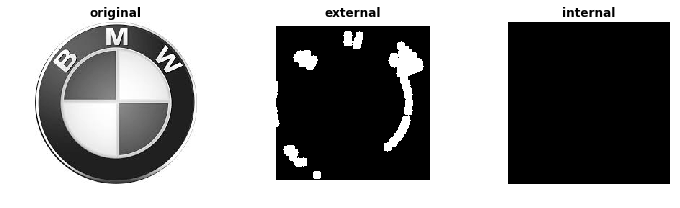

In [15]:
plt.figure(figsize=(10,3))
plt.subplot(131)
plt.axis('off')
plt.title('original')
plt.imshow(image, cmap='gray')

plt.subplot(132)
plt.axis('off')
plt.title('external')
plt.imshow(image_external, cmap='gray')

plt.subplot(133)
plt.axis('off')
plt.title('internal')
plt.imshow(image_internal, cmap='gray')

plt.tight_layout()
plt.show()

## Extracting connected components from a binary image

可參考:https://chtseng.wordpress.com/2016/12/12/opencv-%E9%80%A3%E7%B5%90%E7%89%A9%E4%BB%B6%E6%A8%99%E8%A8%98/

In [16]:
import cv2, numpy as np

In [17]:
img = cv2.imread('./BW.jpg', cv2.IMREAD_GRAYSCALE)
connectivity = 8
num_labels, labelmap = cv2.connectedComponents(img, connectivity, cv2.CV_32S)

In [18]:
img = np.hstack((img, labelmap.astype(np.float32)/(num_labels - 1)))
cv2.imshow('Connected components', img)
cv2.waitKey()
cv2.destroyAllWindows()

In [25]:
img = cv2.imread('./275725.jpg', cv2.IMREAD_GRAYSCALE)
otsu_thr, otsu_mask = cv2.threshold(img, -1 ,1, cv2.THRESH_BINARY | cv2.THRESH_OTSU) 
output = cv2.connectedComponentsWithStats(otsu_mask, connectivity, cv2.CV_32S)

In [27]:
num_labels, labelmap, stats, centers = output
colored = np.full((img.shape[0], img.shape[1],3), 0, np.uint8)
for l in range(1, num_labels):
    if stats[1][4]>200:
        colored[labelmap == 1] = (0, 255*1/num_labels, 255*num_labels/1)
        cv2.circle(colored,(int(centers[1][0]), int(centers[1][1])),5,(255,0,0),cv2.FILLED)
    
img = cv2.cvtColor(otsu_mask*255, cv2.COLOR_GRAY2BGR)
    
cv2.imshow('Connected components', np.hstack((img, colored)))
cv2.waitKey()
cv2.destroyAllWindows()

Fitting lines and circles into two-dimensional point sets

In [29]:
import cv2, numpy as np, random

In [30]:
img = np.full((512,512,3),255,np.uint8)
axes = (int(256*random.uniform(0,1)), int(256*random.uniform(0,1)))
angle = int(180*random.uniform(0,1))
center = (256,256)

In [31]:
pts = cv2.ellipse2Poly(center,axes,angle,0,360,1)
pts += np.random.uniform(-10,10,pts.shape).astype(np.int32)

In [32]:
cv2.ellipse(img, center ,axes, angle, 0, 360, (0,255,0), 3)

for pt in pts:
    cv2.circle(img, (int(pt[0]), int(pt[1])), 3, (0,0,255))

cv2.imshow('Fit ellipse', img)
cv2.waitKey()
cv2.destroyAllWindows()

In [33]:
ellipse = cv2.fitEllipse(pts)
cv2.ellipse(img, ellipse, (0,0,0),3)

cv2.imshow('Fit ellipse', img)
cv2.waitKey()
cv2.destroyAllWindows()

In [34]:
img = np.full((512,512,3),255,np.uint8)

pts = np.arange(512).reshape(-1,1)
pts = np.hstack((pts,pts))
pts += np.random.uniform(-10,10,pts.shape).astype(np.int32)

In [35]:
cv2.line(img, (0,0), (512,512), (0,255,0), 3)

for pt in pts:
    cv2.circle(img, (int(pt[0]), int(pt[1])), 3, (0,0,255))

cv2.imshow('Fit line', img)
cv2.waitKey()
cv2.destroyAllWindows()

In [36]:
vx,vy,x,y = cv2.fitLine(pts, cv2.DIST_L2, 0, 0.01, 0.01)
y0 = int(y - x*vy/vx)
y1 = int((512 - x)*vy/vx + y)
cv2.line(img, (0,y0), (512,y1), (0,0,0),3)

cv2.imshow('Fit line', img)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
Calculating image moments

In [ ]:
import cv2, numpy as np, matplotlib.pyplot as plt

In [37]:
image = np.zeros((480, 640), np.uint8)
cv2.ellipse(image, (320,240), (200,100), 0, 0, 360, 255, -1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [38]:
m = cv2.moments(image)
for name, val in m.items():
    print(name, '\t', val)

m00 	 16119315.0
m10 	 5158101240.0
m01 	 3868620810.0
m20 	 1812142855350.0
m11 	 1237939564800.0
m02 	 969157708320.0
m30 	 683285449618080.0
m21 	 434912202354750.0
m12 	 310125260718570.0
m03 	 252129278267070.0
mu20 	 161575917357.31616
mu11 	 -72.9990234375
mu02 	 40692263506.42969
mu30 	 1687957749.125
mu21 	 -420182048.71875
mu12 	 -422443285.20703125
mu03 	 105694127.71875
nu20 	 0.0006218468887998859
nu11 	 -2.809466679966455e-13
nu02 	 0.00015660970937729079
nu30 	 1.618061841335058e-09
nu21 	 -4.0278291313762605e-10
nu12 	 -4.049505150683136e-10
nu03 	 1.013174855849065e-10


In [39]:
print('Center x estimated', m['m10']/ m['m00'])
print('Center y estimated', m['m01']/ m['m00'])

Center x estimated 319.9950643063927
Center y estimated 239.999082467214


In [ ]:
Working with curves - approximation lenght and area

In [ ]:
Checking whether a point is within a contour (P235)

In [ ]:
Computing the distance to a two-dimensitonal point set from every pixel

In [ ]:
Images segmentation using the k-means algorithm

In [ ]:
Image segmentation using segment seeds, the watershed algorithm(P251)